## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve

## Load dataset

In [2]:
df = pd.read_csv('../raw_data/fraudTrain_cleaned2.csv', index_col=0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852243 entries, 0 to 1852393
Data columns (total 32 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   street                 object 
 8   city                   object 
 9   state                  object 
 10  zip                    int64  
 11  lat                    float64
 12  long                   float64
 13  city_pop               int64  
 14  job                    object 
 15  dob                    object 
 16  trans_num              object 
 17  unix_time              int64  
 18  merch_lat              float64
 19  merch_long             float64
 20  is_fraud               int64  
 21  trans_hour             int64  
 22  abnormal_hours    

In [4]:
df.isnull().sum()

trans_date_trans_time      0
cc_num                     0
merchant                   0
category                   0
amt                        0
first                      0
last                       0
street                     0
city                       0
state                      0
zip                        0
lat                        0
long                       0
city_pop                   0
job                        0
dob                        0
trans_num                  0
unix_time                  0
merch_lat                  0
merch_long                 0
is_fraud                   0
trans_hour                 0
abnormal_hours             0
day_of_week                0
year_month                 0
time_diff                999
count_24_hour              0
count_7_days               0
count_30_days              0
gender_M                   0
dist_haversine             0
age                        0
dtype: int64

In [5]:
df['time_diff'] = df['time_diff'].fillna(value=0)

In [6]:
df.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
trans_hour               0
abnormal_hours           0
day_of_week              0
year_month               0
time_diff                0
count_24_hour            0
count_7_days             0
count_30_days            0
gender_M                 0
dist_haversine           0
age                      0
dtype: int64

## One hot encoding categorical variables

In [7]:
# get dummies for 'category'
cat_dummies = pd.get_dummies(df['category'],prefix='cat')

# Concatenate one-hot encoded dataframe to main dataframe.
df = pd.concat([df, cat_dummies], axis=1)

In [8]:
# get dummies for 'day_of_week'
day_dummies = pd.get_dummies(df['day_of_week'],prefix='day')

# Concatenate one-hot encoded dataframe to main dataframe.
df = pd.concat([df, day_dummies], axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852243 entries, 0 to 1852393
Data columns (total 53 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   street                 object 
 8   city                   object 
 9   state                  object 
 10  zip                    int64  
 11  lat                    float64
 12  long                   float64
 13  city_pop               int64  
 14  job                    object 
 15  dob                    object 
 16  trans_num              object 
 17  unix_time              int64  
 18  merch_lat              float64
 19  merch_long             float64
 20  is_fraud               int64  
 21  trans_hour             int64  
 22  abnormal_hours    

## Drop unnecessary columns

In [10]:
drop_columns = ['street', 'city', 'state', 'zip', 'lat', 'long', 'job', 'dob', 'unix_time', 'merch_lat', 'merch_long', 'trans_hour', 'day_of_week', 'year_month']
df.drop(drop_columns, axis = 1, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852243 entries, 0 to 1852393
Data columns (total 39 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   city_pop               int64  
 8   trans_num              object 
 9   is_fraud               int64  
 10  abnormal_hours         int64  
 11  time_diff              float64
 12  count_24_hour          float64
 13  count_7_days           float64
 14  count_30_days          float64
 15  gender_M               int64  
 16  dist_haversine         float64
 17  age                    int64  
 18  cat_entertainment      uint8  
 19  cat_food_dining        uint8  
 20  cat_gas_transport      uint8  
 21  cat_grocery_net        uint8  
 22  cat_grocery_pos   

In [12]:
corr = df.corr()

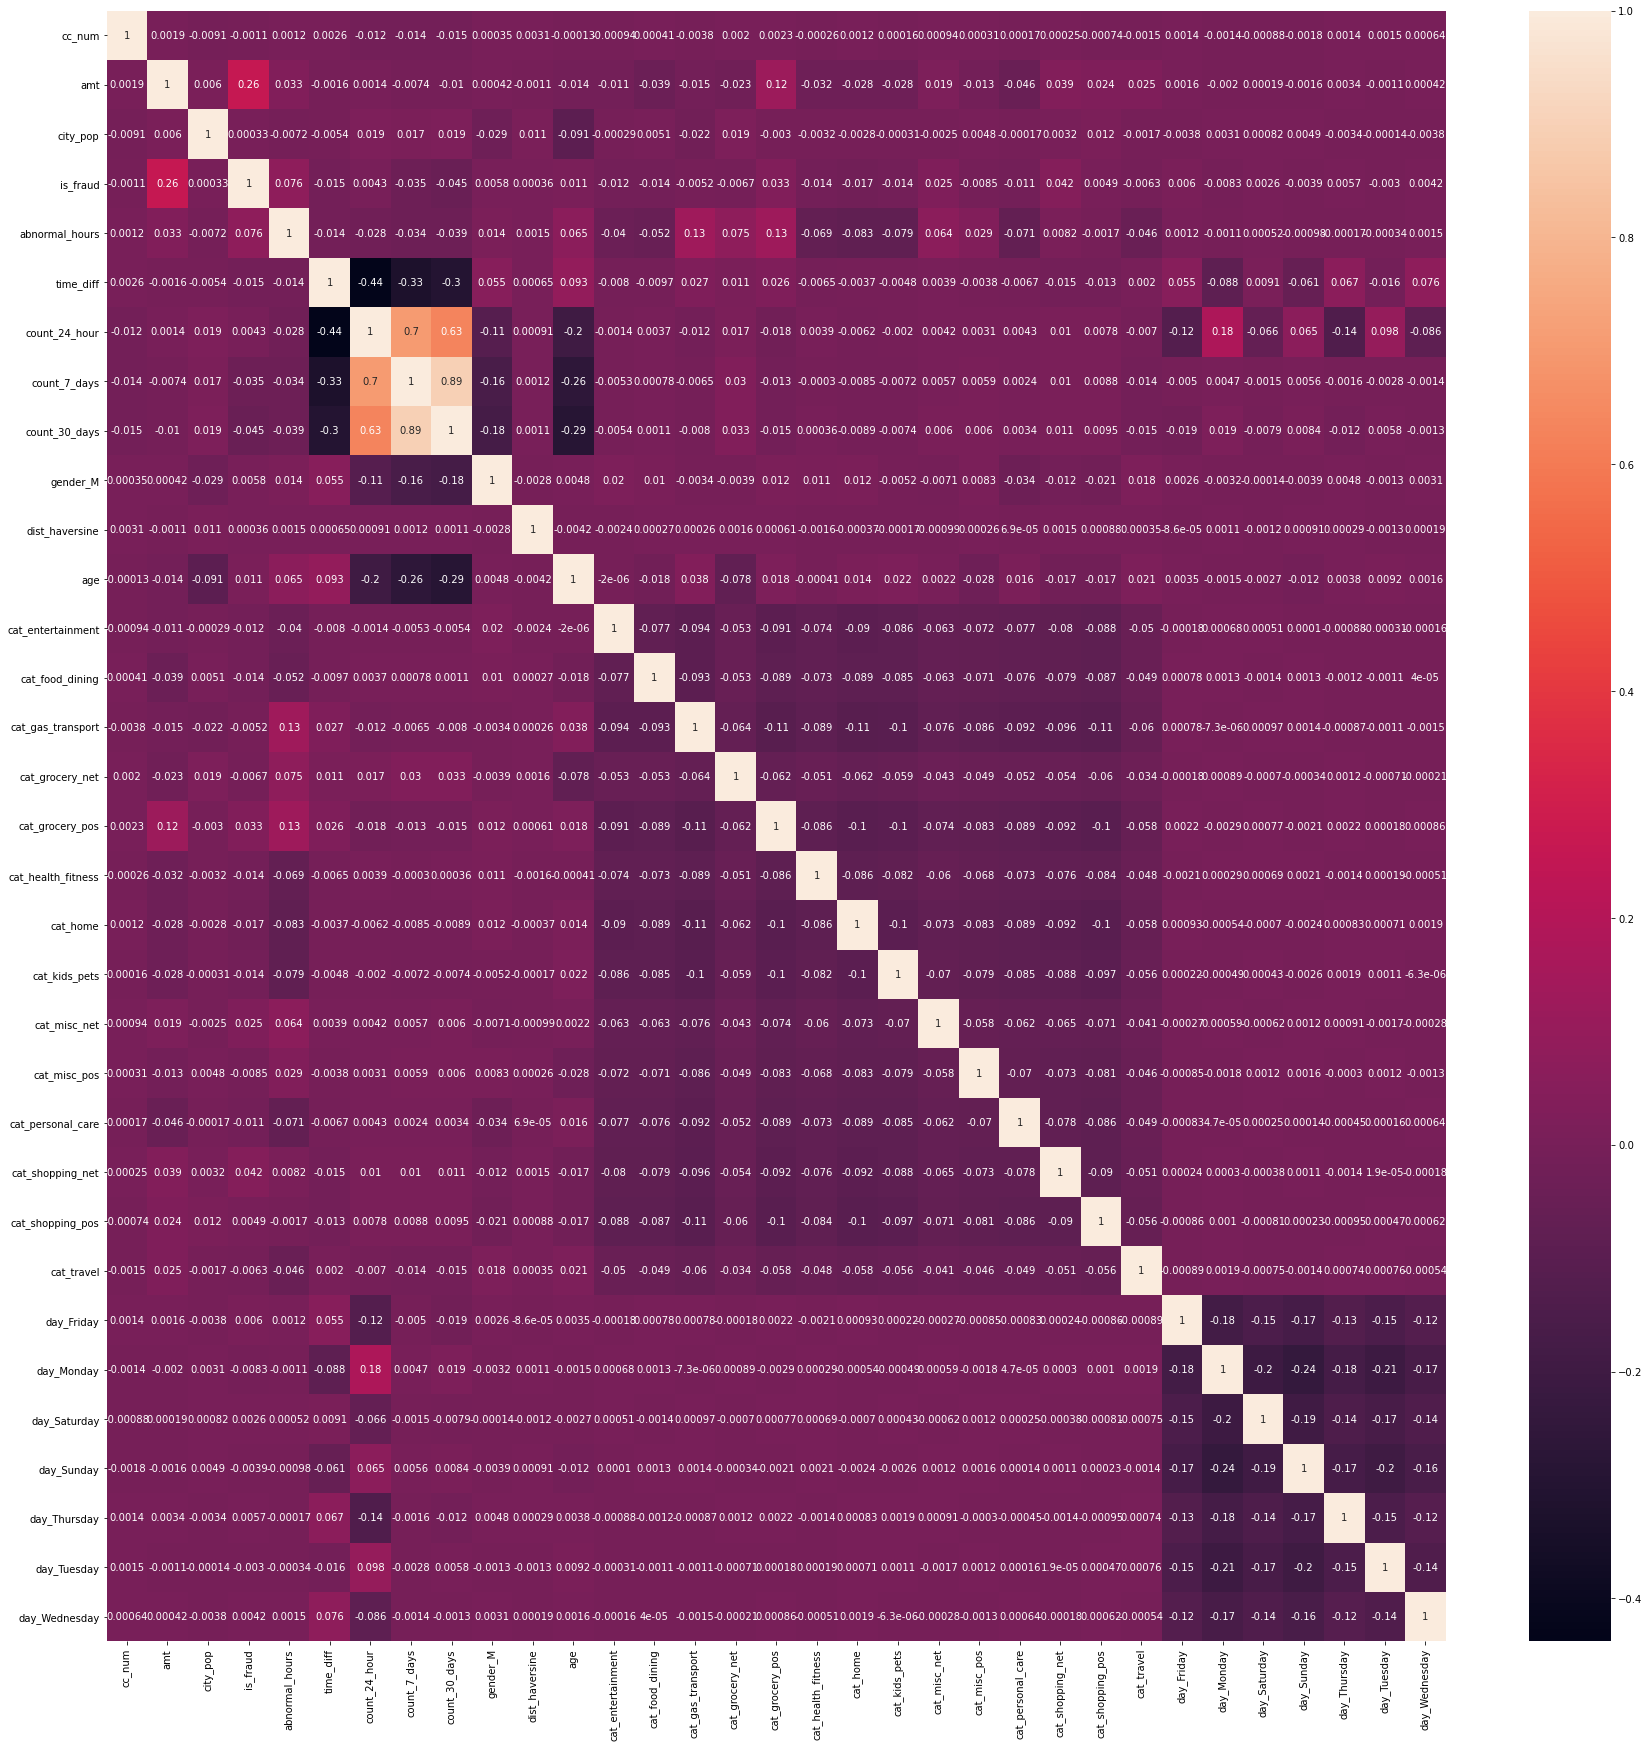

In [13]:
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(corr, annot=True)
plt.show()

In [14]:
df.corr()['is_fraud'].abs().sort_values(ascending=False)

is_fraud              1.000000
amt                   0.261309
abnormal_hours        0.075933
count_30_days         0.044932
cat_shopping_net      0.042452
count_7_days          0.035322
cat_grocery_pos       0.033483
cat_misc_net          0.024666
cat_home              0.016625
time_diff             0.014866
cat_kids_pets         0.014309
cat_food_dining       0.013941
cat_health_fitness    0.013683
cat_entertainment     0.011771
cat_personal_care     0.011380
age                   0.010928
cat_misc_pos          0.008516
day_Monday            0.008270
cat_grocery_net       0.006650
cat_travel            0.006262
day_Friday            0.005979
gender_M              0.005844
day_Thursday          0.005713
cat_gas_transport     0.005158
cat_shopping_pos      0.004947
count_24_hour         0.004317
day_Wednesday         0.004183
day_Sunday            0.003870
day_Tuesday           0.003026
day_Saturday          0.002612
cc_num                0.001125
dist_haversine        0.000360
city_pop

## Split data into training and testing sets.

In [15]:
#Check partition sizes with 80/20 train/test split
len(df) * .8, len(df) * .2

(1481794.4000000001, 370448.60000000003)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='is_fraud'), 
                                                    df.is_fraud, test_size=0.2, 
                                                    random_state=47,
                                                    stratify = df['is_fraud'])

Using stratification to ensure that train set and test set have same proportion of fraud/valid transactions

In [17]:
X_train.shape, X_test.shape

((1481794, 38), (370449, 38))

In [18]:
y_train.shape, y_test.shape

((1481794,), (370449,))

In [19]:
# Confirming proportion of fraud/valid transactions
train_valid_qty = len(y_train[y_train==0])
train_fraud_qty = len(y_train[y_train==1])
test_valid_qty = len(y_test[y_test==0])
test_fraud_qty = len(y_test[y_test==1])

print('Percentage of fraud transactions in original set: {}%'.format(round((len(df[df.is_fraud==1])/len(df))*100, 2)))
print('Percentage of fraud transactions in train set: {}%'.format(round((train_fraud_qty/len(y_train))*100,2)))
print('Percentage of fraud transactions in test set: {}%'.format(round((test_fraud_qty/len(y_test))*100,2)))

Percentage of fraud transactions in original set: 0.52%
Percentage of fraud transactions in train set: 0.52%
Percentage of fraud transactions in test set: 0.52%


In [20]:
#Save the 'trans_date_trans_time', 'cc_num', 'merchant', 'category', 'first', 'last' columns 
#from the train/test data into labels_train and labels_test
#Then drop those columns from `X_train` and `X_test`.

labels_list = ['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'first', 'last', 'trans_num']
labels_train = X_train[['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'first', 'last', 'trans_num']]
labels_test = X_test[['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'first', 'last', 'trans_num']]
X_train.drop(columns=labels_list, inplace=True)
X_test.drop(columns=labels_list, inplace=True)
X_train.shape, X_test.shape

((1481794, 31), (370449, 31))

In [21]:
#Check the `info` method of `X_train` to verify all features are numeric
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1481794 entries, 572842 to 269493
Data columns (total 31 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   amt                 1481794 non-null  float64
 1   city_pop            1481794 non-null  int64  
 2   abnormal_hours      1481794 non-null  int64  
 3   time_diff           1481794 non-null  float64
 4   count_24_hour       1481794 non-null  float64
 5   count_7_days        1481794 non-null  float64
 6   count_30_days       1481794 non-null  float64
 7   gender_M            1481794 non-null  int64  
 8   dist_haversine      1481794 non-null  float64
 9   age                 1481794 non-null  int64  
 10  cat_entertainment   1481794 non-null  uint8  
 11  cat_food_dining     1481794 non-null  uint8  
 12  cat_gas_transport   1481794 non-null  uint8  
 13  cat_grocery_net     1481794 non-null  uint8  
 14  cat_grocery_pos     1481794 non-null  uint8  
 15  cat_health_

In [22]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370449 entries, 1634393 to 1228030
Data columns (total 31 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   amt                 370449 non-null  float64
 1   city_pop            370449 non-null  int64  
 2   abnormal_hours      370449 non-null  int64  
 3   time_diff           370449 non-null  float64
 4   count_24_hour       370449 non-null  float64
 5   count_7_days        370449 non-null  float64
 6   count_30_days       370449 non-null  float64
 7   gender_M            370449 non-null  int64  
 8   dist_haversine      370449 non-null  float64
 9   age                 370449 non-null  int64  
 10  cat_entertainment   370449 non-null  uint8  
 11  cat_food_dining     370449 non-null  uint8  
 12  cat_gas_transport   370449 non-null  uint8  
 13  cat_grocery_net     370449 non-null  uint8  
 14  cat_grocery_pos     370449 non-null  uint8  
 15  cat_health_fitness  370449 

## Feature Scaling


In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
X_train_scaled = scaler.fit_transform(X_train)

In [24]:
X_test_scaled = scaler.transform(X_test)

## Initial baseline modeling

We'll use LogisticRegression and compare the results from using unscaled vs scaled data.

### Initial model with unscaled data.

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg1 = LogisticRegression(max_iter=100000)
# Fit the model on the trainng data.
logreg1.fit(X_train, y_train)

y_pred_train = logreg1.predict(X_train)
y_pred_test = logreg1.predict(X_test)

# Print the accuracy from the testing data.
print(accuracy_score(y_pred_test, y_test))

0.99423402411668


This doesn't tell us very much because of the imbalanced nature of the data. It's possible that the model has accurately predicted EVERY transaction as non-fraud and still have a high accuracy score.

In [26]:
from sklearn.metrics import classification_report

print("[Training Classification Report]")
print(classification_report(y_train, y_pred_train))

print("[Test Classification Report]")
print(classification_report(y_test, y_pred_test))

[Training Classification Report]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00   1474073
           1       0.22      0.03      0.06      7721

    accuracy                           0.99   1481794
   macro avg       0.61      0.52      0.53   1481794
weighted avg       0.99      0.99      0.99   1481794

[Test Classification Report]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    368519
           1       0.19      0.03      0.06      1930

    accuracy                           0.99    370449
   macro avg       0.59      0.52      0.53    370449
weighted avg       0.99      0.99      0.99    370449



Precision and recall for the fraud class is extremely poor, but to be expected due to the imbalanced nature of this dataset.  We will need to apply techniques in the next notebook to balance the classes prior to training multiple models for comparison.

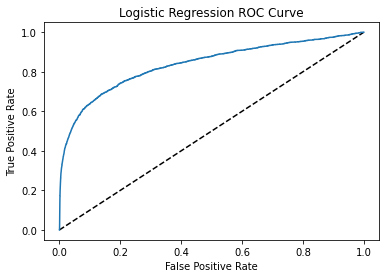

In [27]:
from sklearn.metrics import roc_curve

y_pred_prob = logreg1.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

In [28]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_prob)

0.8380365846674872

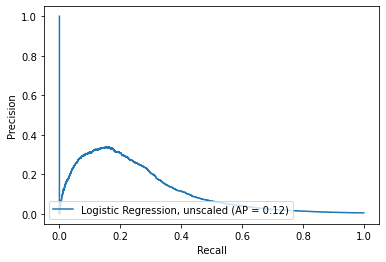

In [29]:
from sklearn.metrics import plot_precision_recall_curve

plot_precision_recall_curve(logreg1, X_test, y_test, name = 'Logistic Regression, unscaled')

### Initial model with scaled data.

In [30]:
logreg2 = LogisticRegression(max_iter=100000)
# Fit the model on the trainng data.
logreg2.fit(X_train_scaled, y_train)

y_pred_train2 = logreg2.predict(X_train_scaled)
y_pred_test2 = logreg2.predict(X_test_scaled)

# Print the accuracy from the testing data.
print(accuracy_score(y_pred_test2, y_test))

0.9947091232531333


In [31]:
from sklearn.metrics import classification_report

print("[Training Classification Report]")
print(classification_report(y_train, y_pred_train2))

print("[Test Classification Report]")
print(classification_report(y_test, y_pred_test2))

[Training Classification Report]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1474073
           1       0.49      0.11      0.18      7721

    accuracy                           0.99   1481794
   macro avg       0.74      0.55      0.59   1481794
weighted avg       0.99      0.99      0.99   1481794

[Test Classification Report]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368519
           1       0.47      0.11      0.17      1930

    accuracy                           0.99    370449
   macro avg       0.73      0.55      0.59    370449
weighted avg       0.99      0.99      0.99    370449



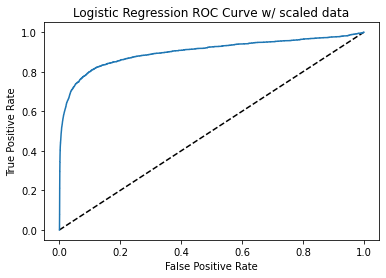

In [32]:
y_pred_prob2 = logreg2.predict_proba(X_test_scaled)[:, 1]

fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred_prob2)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr2, tpr2, label='Logistic Regression')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve w/ scaled data')
plt.show()

In [33]:
roc_auc_score(y_test, y_pred_prob2)

0.9010630859128376

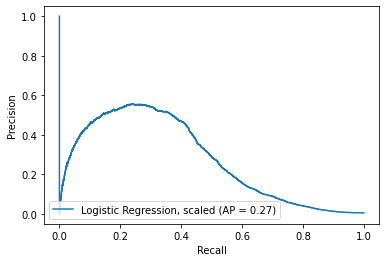

In [34]:
plot_precision_recall_curve(logreg2, X_test_scaled, y_test, name = 'Logistic Regression, scaled')

Performance improves slightly when using scaled data.

## GridSearchCV to tune parameters

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [37]:
logreg3 = LogisticRegression(solver='saga', max_iter=100000)
penalty = ['l1', 'l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(penalty=penalty,C=c_values)


logreg3_cv = GridSearchCV(estimator = logreg3, param_grid = grid, cv=5, scoring = 'recall')

logreg3_cv.fit(X_train_scaled, y_train)

print(logreg3_cv.best_params_, logreg3_cv.best_score_)

{'C': 100, 'penalty': 'l1'} 0.10633398728976977


Run logistic regression using best parameters on all the training data.

In [38]:
logreg4 = LogisticRegression(solver='saga', C=100, penalty='l1', max_iter = 100000)

logreg4.fit(X_train_scaled, y_train)

y_pred_train4 = logreg4.predict(X_train_scaled)
y_pred_test4 = logreg4.predict(X_test_scaled)

In [39]:
print("[Training Classification Report]")
print(classification_report(y_train, y_pred_train4))

print("[Test Classification Report]")
print(classification_report(y_test, y_pred_test4))

[Training Classification Report]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1474073
           1       0.49      0.11      0.18      7721

    accuracy                           0.99   1481794
   macro avg       0.74      0.55      0.59   1481794
weighted avg       0.99      0.99      0.99   1481794

[Test Classification Report]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368519
           1       0.47      0.11      0.17      1930

    accuracy                           0.99    370449
   macro avg       0.73      0.55      0.59    370449
weighted avg       0.99      0.99      0.99    370449



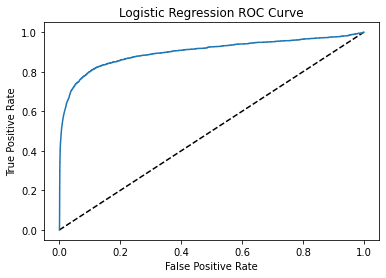

In [40]:
y_pred_prob4 = logreg4.predict_proba(X_test_scaled)[:, 1]

fpr4, tpr4, thresholds4 = roc_curve(y_test, y_pred_prob4)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr4, tpr4, label='Logistic Regression')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

In [41]:
roc_auc_score(y_test, y_pred_prob4)

0.9010555540144323

Because of the imbalanced nature of the problem, we should not expect to see any significant improvements unless we balance the classes. We will do this in the next notebook.

In [47]:
# Save files
#save the data to a new csv file
X_train.to_csv('../raw_data/X_train.csv')
X_test.to_csv('../raw_data/X_test.csv')
pd.DataFrame(X_train_scaled, columns = X_train.columns).to_csv('../raw_data/X_train_scaled.csv')
pd.DataFrame(X_test_scaled, columns = X_test.columns).to_csv('../raw_data/X_test_scaled.csv')
y_train.to_csv('../raw_data/y_train.csv')
y_test.to_csv('../raw_data/y_test.csv')